# Predicting Points Per Game for an NBA Team 


This notebook demonstrates the process of building a predictive model to suggest how many points per game an NBA team would have (in this case we will take a look at the Sacramento Kings).
All the processes involved, such as data wrangling, feature engineering, exploratory data analysis, inferential statistics and machine learning have been divided into main sections.

This is a **Supervised Regression** Machine Learning Problem we are solving.

# Importing Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None 

sns.set_style("whitegrid")

%matplotlib inline

In Data Wrangling we need to load all the data available that is important to us such as Points, Assists, Wins, FG%, etc.
Then we would take a look at the correlation of the data between each other. 

The first step is to load all the data available to us in a Pandas Dataframe and extract basic information such as number of samples, number of null values rows, number of features, etc. 

The next step would be to deal with the missing values using a suitable method (dropping, interpolating, etc.) and convert certain features into a more suitable form for applying inferential statistics and machine learning algorithms.

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/nba-games/games_details.csv
/kaggle/input/nba-games/games.csv
/kaggle/input/nba-games/teams.csv
/kaggle/input/nba-games/ranking.csv
/kaggle/input/nba-games/players.csv


# Data Wrangling

In the first section of the notebook, I will attempt at cleaning the NBA Dataset and wrangling into a form that is suitable for further analysis.
he entire data wrangling process will be done using the Python Pandas library.

In [3]:
games = pd.read_csv("/kaggle/input/nba-games/games.csv")
games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2020-03-01,21900895,Final,1610612766,1610612749,2019,1610612766,85.0,0.354,0.900,...,22.0,47.0,1610612749,93.0,0.402,0.762,0.226,20.0,61.0,0
1,2020-03-01,21900896,Final,1610612750,1610612742,2019,1610612750,91.0,0.364,0.400,...,19.0,57.0,1610612742,111.0,0.468,0.632,0.275,28.0,56.0,0
2,2020-03-01,21900897,Final,1610612746,1610612755,2019,1610612746,136.0,0.592,0.805,...,25.0,37.0,1610612755,130.0,0.505,0.650,0.488,27.0,37.0,1
3,2020-03-01,21900898,Final,1610612743,1610612761,2019,1610612743,133.0,0.566,0.700,...,38.0,41.0,1610612761,118.0,0.461,0.897,0.263,24.0,36.0,1
4,2020-03-01,21900899,Final,1610612758,1610612765,2019,1610612758,106.0,0.407,0.885,...,18.0,51.0,1610612765,100.0,0.413,0.667,0.429,23.0,42.0,1


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23195 entries, 0 to 23194
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     23195 non-null  object 
 1   GAME_ID           23195 non-null  int64  
 2   GAME_STATUS_TEXT  23195 non-null  object 
 3   HOME_TEAM_ID      23195 non-null  int64  
 4   VISITOR_TEAM_ID   23195 non-null  int64  
 5   SEASON            23195 non-null  int64  
 6   TEAM_ID_home      23195 non-null  int64  
 7   PTS_home          23096 non-null  float64
 8   FG_PCT_home       23096 non-null  float64
 9   FT_PCT_home       23096 non-null  float64
 10  FG3_PCT_home      23096 non-null  float64
 11  AST_home          23096 non-null  float64
 12  REB_home          23096 non-null  float64
 13  TEAM_ID_away      23195 non-null  int64  
 14  PTS_away          23096 non-null  float64
 15  FG_PCT_away       23096 non-null  float64
 16  FT_PCT_away       23096 non-null  float6

Here we notice that most of the fields are either Integers or Floats, aside from `GAME_DATE_EST` and `GAME_STATUS_TEXT`.
It does look like there are duplicates for `HOME_TEAM_ID`, `TEAM_ID_home` and `VISITOR_TEAM_ID`, `TEAM_ID_away`. 

We'll take a closer look at these IDs in this section.

In [5]:
# GAME_DATE_EST
games['GAME_DATE_EST'].head()

0    2020-03-01
1    2020-03-01
2    2020-03-01
3    2020-03-01
4    2020-03-01
Name: GAME_DATE_EST, dtype: object

In [6]:
# Parsing dates using pd.to_datetime on GAME_DATE_EST
games['date']= pd.to_datetime(games['GAME_DATE_EST'])
games['month'] = games['date'].apply(lambda date:date.month)
games['year'] = games['date'].apply(lambda date:date.year)

In [7]:
# Lets compare VISITOR_TEAM_ID to TEAM_ID_away and HOME_TEAM_ID and TEAM_ID_home
games[['VISITOR_TEAM_ID', 'TEAM_ID_away', 'HOME_TEAM_ID', 'TEAM_ID_home']]

,VISITOR_TEAM_ID,TEAM_ID_away,HOME_TEAM_ID,TEAM_ID_home
0,1610612749,1610612749,1610612766,1610612766
1,1610612742,1610612742,1610612750,1610612750
2,1610612755,1610612755,1610612746,1610612746
3,1610612761,1610612761,1610612743,1610612743
4,1610612765,1610612765,1610612758,1610612758
...,...,...,...,...
23190,1610612740,1610612740,1610612737,1610612737
23191,1610612764,1610612764,1610612741,1610612741
23192,1610612743,1610612743,1610612747,1610612747
23193,1610612758,1610612758,1610612761,1610612761


It looks to be identical so we'll go ahead and drop TEAM_ID_*

In [8]:
# GAME_STATUS_TEXT
games['GAME_STATUS_TEXT'].unique()

array(['Final'], dtype=object)

It looks like `GAME_STATUS_TEXT` has 1 constant `FINAL`, so it's safe to drop this column.

In [9]:
games.drop(['GAME_STATUS_TEXT', 'TEAM_ID_home', 'TEAM_ID_away', "GAME_ID", 'GAME_DATE_EST'], 1, inplace=True)

Now let's take a look at null columns

In [10]:
games.isnull().sum()
games[games.isna().any(axis=1)]

,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,date,month,year
15719,1610612753,1610612762,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2003-10-24,10,2003
15720,1610612737,1610612764,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2003-10-24,10,2003
15721,1610612738,1610612751,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2003-10-24,10,2003
15722,1610612759,1610612745,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2003-10-24,10,2003
15723,1610612749,1610612765,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2003-10-24,10,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15813,1610612743,1610612756,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2003-10-09,10,2003
15814,1610612757,1610612758,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2003-10-09,10,2003
15815,1610612759,1610612763,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2003-10-08,10,2003
15822,1610612747,1610612744,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2003-10-08,10,2003


It looks like in 2003 there were some games that was NA. We'll go ahead and drop these columns since it doesn't look like there's any information we can extract from here.

In [11]:
games.dropna(inplace=True)
games.isnull().sum()

HOME_TEAM_ID       0
VISITOR_TEAM_ID    0
SEASON             0
PTS_home           0
FG_PCT_home        0
FT_PCT_home        0
FG3_PCT_home       0
AST_home           0
REB_home           0
PTS_away           0
FG_PCT_away        0
FT_PCT_away        0
FG3_PCT_away       0
AST_away           0
REB_away           0
HOME_TEAM_WINS     0
date               0
month              0
year               0
dtype: int64

In [12]:
# Now we're just going to rename the columns to simplify
games.rename(columns = {
    "SEASON": "season",
    "HOME_TEAM_ID": "home_team",
    "VISITOR_TEAM_ID": "away_team",
    "PTS_home": "home_pts",
    "FG_PCT_home": "home_fg%",
    "FT_PCT_home": "home_ft%",
    "FG3_PCT_home": "home_3p%",
    "AST_home": "home_ast",
    "REB_home": "home_reb",
    "PTS_away": "away_pts",
    "FG_PCT_away": "away_fg%",
    "FT_PCT_away": "away_ft%",
    "FG3_PCT_away": "away_3p%",
    "AST_away": "away_ast",
    "REB_away": "away_reb",
    "HOME_TEAM_WINS": "home_W"
}, inplace=True)

In [13]:
games.head()

,home_team,away_team,season,home_pts,home_fg%,home_ft%,home_3p%,home_ast,home_reb,away_pts,away_fg%,away_ft%,away_3p%,away_ast,away_reb,home_W,date,month,year
0,1610612766,1610612749,2019,85.0,0.354,0.900,0.229,22.0,47.0,93.0,0.402,0.762,0.226,20.0,61.0,0,2020-03-01,3,2020
1,1610612750,1610612742,2019,91.0,0.364,0.400,0.310,19.0,57.0,111.0,0.468,0.632,0.275,28.0,56.0,0,2020-03-01,3,2020
2,1610612746,1610612755,2019,136.0,0.592,0.805,0.542,25.0,37.0,130.0,0.505,0.650,0.488,27.0,37.0,1,2020-03-01,3,2020
3,1610612743,1610612761,2019,133.0,0.566,0.700,0.500,38.0,41.0,118.0,0.461,0.897,0.263,24.0,36.0,1,2020-03-01,3,2020
4,1610612758,1610612765,2019,106.0,0.407,0.885,0.257,18.0,51.0,100.0,0.413,0.667,0.429,23.0,42.0,1,2020-03-01,3,2020


# Feature Engineering (Sacramento Kings)
Since the `games` data only contains the IDs of teams, let's take a look and see if we can replace those IDs with the real names of the teams or something more recognizable 

In [14]:
teams = pd.read_csv("/kaggle/input/nba-games/teams.csv")
teams.head()

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends


In [15]:
team_ids = teams[['TEAM_ID', 'ABBREVIATION']]
for i,name in team_ids.itertuples(index=False):
    games.loc[games['home_team'] == i, 'home_team'] = name
    games.loc[games['away_team'] == i, 'away_team'] = name

In [16]:
games.head()

,home_team,away_team,season,home_pts,home_fg%,home_ft%,home_3p%,home_ast,home_reb,away_pts,away_fg%,away_ft%,away_3p%,away_ast,away_reb,home_W,date,month,year
0,CHA,MIL,2019,85.0,0.354,0.900,0.229,22.0,47.0,93.0,0.402,0.762,0.226,20.0,61.0,0,2020-03-01,3,2020
1,MIN,DAL,2019,91.0,0.364,0.400,0.310,19.0,57.0,111.0,0.468,0.632,0.275,28.0,56.0,0,2020-03-01,3,2020
2,LAC,PHI,2019,136.0,0.592,0.805,0.542,25.0,37.0,130.0,0.505,0.650,0.488,27.0,37.0,1,2020-03-01,3,2020
3,DEN,TOR,2019,133.0,0.566,0.700,0.500,38.0,41.0,118.0,0.461,0.897,0.263,24.0,36.0,1,2020-03-01,3,2020
4,SAC,DET,2019,106.0,0.407,0.885,0.257,18.0,51.0,100.0,0.413,0.667,0.429,23.0,42.0,1,2020-03-01,3,2020


Now let's go ahead and transform the data so that it suits our favorite team!

First we need to create a dataframe that only has the Sacramento Kings on here, so we'll go ahead and do that.

In [17]:
sac_games = games[(games['home_team'] == 'SAC') | (games['away_team'] == 'SAC')]
sac_games.head()

,home_team,away_team,season,home_pts,home_fg%,home_ft%,home_3p%,home_ast,home_reb,away_pts,away_fg%,away_ft%,away_3p%,away_ast,away_reb,home_W,date,month,year
4,SAC,DET,2019,106.0,0.407,0.885,0.257,18.0,51.0,100.0,0.413,0.667,0.429,23.0,42.0,1,2020-03-01,3,2020
19,MEM,SAC,2019,101.0,0.429,0.750,0.267,27.0,52.0,104.0,0.418,0.810,0.289,24.0,47.0,0,2020-02-28,2,2020
27,OKC,SAC,2019,112.0,0.488,0.724,0.346,20.0,37.0,108.0,0.451,1.000,0.343,30.0,45.0,1,2020-02-27,2,2020
44,GSW,SAC,2019,94.0,0.443,0.833,0.143,21.0,34.0,112.0,0.526,0.559,0.433,25.0,40.0,0,2020-02-25,2,2020
60,LAC,SAC,2019,103.0,0.391,0.862,0.333,20.0,47.0,112.0,0.449,0.769,0.387,25.0,48.0,0,2020-02-22,2,2020


In [18]:
sac_games.shape

(1477, 19)

We now have only the games of the Sacramento Kings team throughout the years. We're one step closer to where we need to be.

Now, because our goal is to get the statistics of the Sacramento Kings, we're only concerned of the statistics of the Kings vs any other opponent.
For now, we don't have a way to differentiate that. So let's create some python functions to do some Feature Engineering with our data.

In [19]:
# Check to see if they are the home team
def is_home(home_tm, team_name):
    return 1 if home_tm == team_name else 0

# Check to see who the opponent is
def opponent(home_tm, away_tm, team_name):
    return away_tm if home_tm == team_name else home_tm if away_tm == team_name else 0

# See if they win the game
def team_wins(home_team,home_pts,away_pts):
    if home_team == 1:
        return 1 if home_pts > away_pts else 0
    else:
        return 0 if home_pts > away_pts else 1
    
# Set attribute to either home or vs
def set_attr(is_home, attr_home, attr_away):
    return attr_home if is_home == 1 else attr_away

In [20]:
sac_games['is_home'] = sac_games.apply(lambda x: is_home(x['home_team'], 'SAC'), 1)
sac_games['vs'] = sac_games.apply(lambda x: opponent(x['home_team'], x['away_team'], 'SAC'), 1)
sac_games['W'] = sac_games.apply(lambda x: team_wins(x['is_home'], x['home_pts'], x['away_pts']), 1)

In [21]:
sac_games['pts'] = sac_games.apply(lambda x : set_attr(x['is_home'], x['home_pts'], x['away_pts']), 1)
sac_games['ast'] = sac_games.apply(lambda x : set_attr(x['is_home'], x['home_ast'], x['away_ast']), 1)
sac_games['reb'] = sac_games.apply(lambda x : set_attr(x['is_home'], x['home_reb'], x['away_reb']), 1)
sac_games['fg%'] = sac_games.apply(lambda x : set_attr(x['is_home'], x['home_fg%'], x['away_fg%']), 1)
sac_games['ft%'] = sac_games.apply(lambda x : set_attr(x['is_home'], x['home_ft%'], x['away_ft%']), 1)
sac_games['3p%'] = sac_games.apply(lambda x : set_attr(x['is_home'], x['home_3p%'], x['away_3p%']), 1)

sac_games['vs_pts'] = sac_games.apply(lambda x : set_attr(x['is_home'], x['away_pts'], x['home_pts']), 1)
sac_games['vs_ast'] = sac_games.apply(lambda x : set_attr(x['is_home'], x['away_ast'], x['home_ast']), 1)
sac_games['vs_reb'] = sac_games.apply(lambda x : set_attr(x['is_home'], x['away_reb'], x['home_reb']), 1)
sac_games['vs_fg%'] = sac_games.apply(lambda x : set_attr(x['is_home'], x['away_fg%'], x['home_fg%']), 1)
sac_games['vs_ft%'] = sac_games.apply(lambda x : set_attr(x['is_home'], x['away_ft%'], x['home_ft%']), 1)
sac_games['vs_3p%'] = sac_games.apply(lambda x : set_attr(x['is_home'], x['away_3p%'], x['home_3p%']), 1)

In [22]:
sac_games.head()

,home_team,away_team,season,home_pts,home_fg%,home_ft%,home_3p%,home_ast,home_reb,away_pts,...,reb,fg%,ft%,3p%,vs_pts,vs_ast,vs_reb,vs_fg%,vs_ft%,vs_3p%
4,SAC,DET,2019,106.0,0.407,0.885,0.257,18.0,51.0,100.0,...,51.0,0.407,0.885,0.257,100.0,23.0,42.0,0.413,0.667,0.429
19,MEM,SAC,2019,101.0,0.429,0.750,0.267,27.0,52.0,104.0,...,47.0,0.418,0.810,0.289,101.0,27.0,52.0,0.429,0.750,0.267
27,OKC,SAC,2019,112.0,0.488,0.724,0.346,20.0,37.0,108.0,...,45.0,0.451,1.000,0.343,112.0,20.0,37.0,0.488,0.724,0.346
44,GSW,SAC,2019,94.0,0.443,0.833,0.143,21.0,34.0,112.0,...,40.0,0.526,0.559,0.433,94.0,21.0,34.0,0.443,0.833,0.143
60,LAC,SAC,2019,103.0,0.391,0.862,0.333,20.0,47.0,112.0,...,48.0,0.449,0.769,0.387,103.0,20.0,47.0,0.391,0.862,0.333


This might seem like a lot of code, but all we did was assign `home_stat` to the Kings depending on whether they are home or away and `vs_stat` to the other opponent without worrying about who is home.

Next, what we're going to do is drop all of the unnecesary columns that doesn't pertain to our machine learning model.

In [23]:
sac_games.drop(['home_team', 'away_team', 'season', 'home_pts', 'home_fg%',
       'home_ft%', 'home_3p%', 'home_ast', 'home_reb', 'away_pts', 'away_fg%',
       'away_ft%', 'away_3p%', 'away_ast', 'away_reb', 'home_W',], 1, inplace=True)

In [24]:
sac_games.head()

,date,month,year,is_home,vs,W,pts,ast,reb,fg%,ft%,3p%,vs_pts,vs_ast,vs_reb,vs_fg%,vs_ft%,vs_3p%
4,2020-03-01,3,2020,1,DET,1,106.0,18.0,51.0,0.407,0.885,0.257,100.0,23.0,42.0,0.413,0.667,0.429
19,2020-02-28,2,2020,0,MEM,1,104.0,24.0,47.0,0.418,0.810,0.289,101.0,27.0,52.0,0.429,0.750,0.267
27,2020-02-27,2,2020,0,OKC,0,108.0,30.0,45.0,0.451,1.000,0.343,112.0,20.0,37.0,0.488,0.724,0.346
44,2020-02-25,2,2020,0,GSW,1,112.0,25.0,40.0,0.526,0.559,0.433,94.0,21.0,34.0,0.443,0.833,0.143
60,2020-02-22,2,2020,0,LAC,1,112.0,25.0,48.0,0.449,0.769,0.387,103.0,20.0,47.0,0.391,0.862,0.333


# Feature Engineering (LA Lakers)

In [25]:
lal_games = games[(games['home_team'] == 'LAL') | (games['away_team'] == 'LAL')]
lal_games.head()

,home_team,away_team,season,home_pts,home_fg%,home_ft%,home_3p%,home_ast,home_reb,away_pts,away_fg%,away_ft%,away_3p%,away_ast,away_reb,home_W,date,month,year
5,NOP,LAL,2019,114.0,0.421,0.818,0.219,24.0,52.0,122.0,0.515,0.900,0.371,23.0,36.0,0,2020-03-01,3,2020
11,MEM,LAL,2019,105.0,0.453,0.818,0.323,27.0,51.0,88.0,0.409,0.583,0.250,26.0,45.0,1,2020-02-29,2,2020
28,GSW,LAL,2019,86.0,0.425,0.900,0.281,27.0,37.0,116.0,0.511,0.667,0.333,24.0,44.0,0,2020-02-27,2,2020
42,LAL,NOP,2019,118.0,0.441,0.714,0.295,27.0,51.0,109.0,0.453,0.767,0.296,31.0,45.0,1,2020-02-25,2,2020
53,LAL,BOS,2019,114.0,0.453,0.676,0.324,20.0,46.0,112.0,0.458,0.767,0.382,20.0,44.0,1,2020-02-23,2,2020


In [26]:
lal_games.shape

(1586, 19)

In [27]:
lal_games['is_home'] = lal_games.apply(lambda x: is_home(x['home_team'], 'LAL'), 1)
lal_games['vs'] = lal_games.apply(lambda x: opponent(x['home_team'], x['away_team'], 'LAL'), 1)
lal_games['W'] = lal_games.apply(lambda x: team_wins(x['is_home'], x['home_pts'], x['away_pts']), 1)

In [28]:
lal_games['pts'] = lal_games.apply(lambda x : set_attr(x['is_home'], x['home_pts'], x['away_pts']), 1)
lal_games['ast'] = lal_games.apply(lambda x : set_attr(x['is_home'], x['home_ast'], x['away_ast']), 1)
lal_games['reb'] = lal_games.apply(lambda x : set_attr(x['is_home'], x['home_reb'], x['away_reb']), 1)
lal_games['fg%'] = lal_games.apply(lambda x : set_attr(x['is_home'], x['home_fg%'], x['away_fg%']), 1)
lal_games['ft%'] = lal_games.apply(lambda x : set_attr(x['is_home'], x['home_ft%'], x['away_ft%']), 1)
lal_games['3p%'] = lal_games.apply(lambda x : set_attr(x['is_home'], x['home_3p%'], x['away_3p%']), 1)

lal_games['vs_pts'] = lal_games.apply(lambda x : set_attr(x['is_home'], x['away_pts'], x['home_pts']), 1)
lal_games['vs_ast'] = lal_games.apply(lambda x : set_attr(x['is_home'], x['away_ast'], x['home_ast']), 1)
lal_games['vs_reb'] = lal_games.apply(lambda x : set_attr(x['is_home'], x['away_reb'], x['home_reb']), 1)
lal_games['vs_fg%'] = lal_games.apply(lambda x : set_attr(x['is_home'], x['away_fg%'], x['home_fg%']), 1)
lal_games['vs_ft%'] = lal_games.apply(lambda x : set_attr(x['is_home'], x['away_ft%'], x['home_ft%']), 1)
lal_games['vs_3p%'] = lal_games.apply(lambda x : set_attr(x['is_home'], x['away_3p%'], x['home_3p%']), 1)

In [29]:
lal_games.drop(['home_team', 'away_team', 'season', 'home_pts', 'home_fg%',
       'home_ft%', 'home_3p%', 'home_ast', 'home_reb', 'away_pts', 'away_fg%',
       'away_ft%', 'away_3p%', 'away_ast', 'away_reb', 'home_W',], 1, inplace=True)

In [30]:
lal_games.head()

,date,month,year,is_home,vs,W,pts,ast,reb,fg%,ft%,3p%,vs_pts,vs_ast,vs_reb,vs_fg%,vs_ft%,vs_3p%
5,2020-03-01,3,2020,0,NOP,1,122.0,23.0,36.0,0.515,0.900,0.371,114.0,24.0,52.0,0.421,0.818,0.219
11,2020-02-29,2,2020,0,MEM,0,88.0,26.0,45.0,0.409,0.583,0.250,105.0,27.0,51.0,0.453,0.818,0.323
28,2020-02-27,2,2020,0,GSW,1,116.0,24.0,44.0,0.511,0.667,0.333,86.0,27.0,37.0,0.425,0.900,0.281
42,2020-02-25,2,2020,1,NOP,1,118.0,27.0,51.0,0.441,0.714,0.295,109.0,31.0,45.0,0.453,0.767,0.296
53,2020-02-23,2,2020,1,BOS,1,114.0,20.0,46.0,0.453,0.676,0.324,112.0,20.0,44.0,0.458,0.767,0.382


# Feature Engineering (GS Warriors)

In [31]:
gsw_games = games[(games['home_team'] == 'GSW') | (games['away_team'] == 'GSW')]
gsw_games.head()

,home_team,away_team,season,home_pts,home_fg%,home_ft%,home_3p%,home_ast,home_reb,away_pts,away_fg%,away_ft%,away_3p%,away_ast,away_reb,home_W,date,month,year
6,GSW,WAS,2019,110.0,0.472,0.708,0.321,25.0,52.0,124.0,0.488,0.889,0.667,24.0,34.0,0,2020-03-01,3,2020
14,PHX,GSW,2019,99.0,0.410,0.826,0.414,24.0,40.0,115.0,0.471,0.750,0.300,30.0,49.0,0,2020-02-29,2,2020
28,GSW,LAL,2019,86.0,0.425,0.900,0.281,27.0,37.0,116.0,0.511,0.667,0.333,24.0,44.0,0,2020-02-27,2,2020
44,GSW,SAC,2019,94.0,0.443,0.833,0.143,21.0,34.0,112.0,0.526,0.559,0.433,25.0,40.0,0,2020-02-25,2,2020
58,GSW,NOP,2019,101.0,0.435,0.667,0.314,28.0,48.0,115.0,0.469,0.462,0.405,34.0,52.0,0,2020-02-23,2,2020


In [32]:
gsw_games.shape

(1586, 19)

In [33]:
gsw_games['is_home'] = gsw_games.apply(lambda x: is_home(x['home_team'], 'GSW'), 1)
gsw_games['vs'] = gsw_games.apply(lambda x: opponent(x['home_team'], x['away_team'], 'GSW'), 1)
gsw_games['W'] = gsw_games.apply(lambda x: team_wins(x['is_home'], x['home_pts'], x['away_pts']), 1)

In [34]:
gsw_games['pts'] = gsw_games.apply(lambda x : set_attr(x['is_home'], x['home_pts'], x['away_pts']), 1)
gsw_games['ast'] = gsw_games.apply(lambda x : set_attr(x['is_home'], x['home_ast'], x['away_ast']), 1)
gsw_games['reb'] = gsw_games.apply(lambda x : set_attr(x['is_home'], x['home_reb'], x['away_reb']), 1)
gsw_games['fg%'] = gsw_games.apply(lambda x : set_attr(x['is_home'], x['home_fg%'], x['away_fg%']), 1)
gsw_games['ft%'] = gsw_games.apply(lambda x : set_attr(x['is_home'], x['home_ft%'], x['away_ft%']), 1)
gsw_games['3p%'] = gsw_games.apply(lambda x : set_attr(x['is_home'], x['home_3p%'], x['away_3p%']), 1)

gsw_games['vs_pts'] = gsw_games.apply(lambda x : set_attr(x['is_home'], x['away_pts'], x['home_pts']), 1)
gsw_games['vs_ast'] = gsw_games.apply(lambda x : set_attr(x['is_home'], x['away_ast'], x['home_ast']), 1)
gsw_games['vs_reb'] = gsw_games.apply(lambda x : set_attr(x['is_home'], x['away_reb'], x['home_reb']), 1)
gsw_games['vs_fg%'] = gsw_games.apply(lambda x : set_attr(x['is_home'], x['away_fg%'], x['home_fg%']), 1)
gsw_games['vs_ft%'] = gsw_games.apply(lambda x : set_attr(x['is_home'], x['away_ft%'], x['home_ft%']), 1)
gsw_games['vs_3p%'] = gsw_games.apply(lambda x : set_attr(x['is_home'], x['away_3p%'], x['home_3p%']), 1)

In [35]:
gsw_games.drop(['home_team', 'away_team', 'season', 'home_pts', 'home_fg%',
       'home_ft%', 'home_3p%', 'home_ast', 'home_reb', 'away_pts', 'away_fg%',
       'away_ft%', 'away_3p%', 'away_ast', 'away_reb', 'home_W',], 1, inplace=True)

In [36]:
gsw_games.head()

,date,month,year,is_home,vs,W,pts,ast,reb,fg%,ft%,3p%,vs_pts,vs_ast,vs_reb,vs_fg%,vs_ft%,vs_3p%
6,2020-03-01,3,2020,1,WAS,0,110.0,25.0,52.0,0.472,0.708,0.321,124.0,24.0,34.0,0.488,0.889,0.667
14,2020-02-29,2,2020,0,PHX,1,115.0,30.0,49.0,0.471,0.750,0.300,99.0,24.0,40.0,0.410,0.826,0.414
28,2020-02-27,2,2020,1,LAL,0,86.0,27.0,37.0,0.425,0.900,0.281,116.0,24.0,44.0,0.511,0.667,0.333
44,2020-02-25,2,2020,1,SAC,0,94.0,21.0,34.0,0.443,0.833,0.143,112.0,25.0,40.0,0.526,0.559,0.433
58,2020-02-23,2,2020,1,NOP,0,101.0,28.0,48.0,0.435,0.667,0.314,115.0,34.0,52.0,0.469,0.462,0.405


# Sacramento Kings Model

In [37]:
from sklearn.model_selection import train_test_split

# Let's set our data
X = sac_games.drop(['pts', 'date', 'month', 'year', 'vs'],1)
y = sac_games['pts']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [38]:
X

,is_home,W,ast,reb,fg%,ft%,3p%,vs_pts,vs_ast,vs_reb,vs_fg%,vs_ft%,vs_3p%
4,1,1,18.0,51.0,0.407,0.885,0.257,100.0,23.0,42.0,0.413,0.667,0.429
19,0,1,24.0,47.0,0.418,0.810,0.289,101.0,27.0,52.0,0.429,0.750,0.267
27,0,0,30.0,45.0,0.451,1.000,0.343,112.0,20.0,37.0,0.488,0.724,0.346
44,0,1,25.0,40.0,0.526,0.559,0.433,94.0,21.0,34.0,0.443,0.833,0.143
60,0,1,25.0,48.0,0.449,0.769,0.387,103.0,20.0,47.0,0.391,0.862,0.333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23120,0,0,19.0,39.0,0.507,0.778,0.125,106.0,24.0,36.0,0.468,0.889,0.308
23144,0,0,21.0,37.0,0.459,0.722,0.419,129.0,30.0,46.0,0.512,0.861,0.480
23158,1,0,17.0,43.0,0.425,0.611,0.385,97.0,21.0,44.0,0.444,0.600,0.350
23187,1,1,20.0,42.0,0.552,0.700,0.364,106.0,24.0,32.0,0.488,0.500,0.417


In [39]:
# Convert data as np.array
features = np.array(X_train)
targets = np.array(y_train)

features_validation= np.array(X_val)
targets_validation = np.array(y_val)

features_test= np.array(X_test)
targets_test = np.array(y_test)

In [40]:
print(features.shape)
print(targets.shape)

print(features_validation.shape)
print(targets_validation.shape)

print(features_test.shape)
print(targets_test.shape)

(944, 13)
(944,)
(237, 13)
(237,)
(296, 13)
(296,)


In [41]:
X_train.iloc[0]

is_home      0.000
W            0.000
ast         27.000
reb         42.000
fg%          0.471
ft%          0.600
3p%          0.391
vs_pts     118.000
vs_ast      27.000
vs_reb      45.000
vs_fg%       0.459
vs_ft%       0.750
vs_3p%       0.448
Name: 7508, dtype: float64

In [42]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Building the model
sac_model = Sequential() 
sac_model.add(Dense(25, input_dim=13, kernel_initializer='normal', activation='relu'))
sac_model.add(Dense(10, kernel_initializer='normal', activation='relu'))
sac_model.add(Dense(5, kernel_initializer='normal', activation='relu'))
sac_model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
sac_model.compile(loss = 'mse', optimizer='adam', metrics=['mse']) #mse: mean_square_error
sac_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                350       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                260       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 671
Trainable params: 671
Non-trainable params: 0
_________________________________________________________________


Using TensorFlow backend.


Step :  0 / 1000
30/30 [==============================] - 0s 1ms/step - loss: 42.2504 - mse: 42.2504
Training MSE: 42.25044631958008
8/8 [==============================] - 0s 1ms/step - loss: 42.4665 - mse: 42.4665
Validation MSE: 42.46648025512695 

Step :  100 / 1000
30/30 [==============================] - 0s 983us/step - loss: 35.6270 - mse: 35.6270
Training MSE: 35.62700271606445
8/8 [==============================] - 0s 1ms/step - loss: 36.0526 - mse: 36.0526
Validation MSE: 36.05255889892578 

Step :  200 / 1000
30/30 [==============================] - 0s 1ms/step - loss: 31.8123 - mse: 31.8123
Training MSE: 31.81232452392578
8/8 [==============================] - 0s 1ms/step - loss: 31.7517 - mse: 31.7517
Validation MSE: 31.751680374145508 

Step :  300 / 1000
30/30 [==============================] - 0s 995us/step - loss: 32.0125 - mse: 32.0125
Training MSE: 32.01251220703125
8/8 [==============================] - 0s 1ms/step - loss: 31.4579 - mse: 31.4579
Validation MSE: 31.45

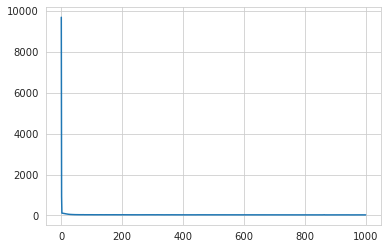

In [43]:
# Training the model
epochs_tot = 1000
epochs_step = 100
epochs_ratio = int(epochs_tot / epochs_step)
hist = np.array([])

for i in range(epochs_ratio):
    history = sac_model.fit(features, targets, epochs=epochs_step, batch_size=10, verbose=0)
    
    # Evaluating the model on the training and testing set
    print("Step : " , i * epochs_step, "/", epochs_tot)
    score = sac_model.evaluate(features, targets)
    print("Training MSE:", score[1])
    score = sac_model.evaluate(features_validation, targets_validation)
    print("Validation MSE:", score[1], "\n")
    hist = np.concatenate((hist, np.array(history.history['mse'])), axis = 0)
    
# plot metrics
plt.plot(hist)
plt.show()

In [44]:
#prediction and error checking
predictions = sac_model.predict(features_validation, verbose=0)

print('R2 score = ',round(r2_score(y_val, predictions), 2))
print('MSE score = ',round(mean_squared_error(y_val, predictions), 2))

R2 score =  0.83
MSE score =  26.62


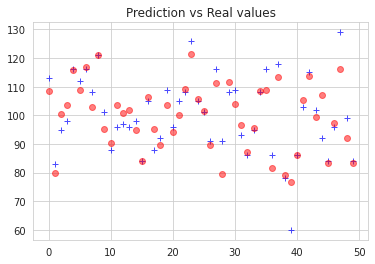

In [45]:
plt.plot(y_val.reset_index()['pts'][0:50], '+', color ='blue', alpha=0.7)
plt.plot(predictions[0:50], 'ro', color ='red', alpha=0.5)
plt.title('Prediction vs Real values')
plt.show()

In [46]:
#prediction and error checking
predictions = sac_model.predict(features_test, verbose=0)

print('R2 score = ',round(r2_score(y_test, predictions), 2))
print('MSE score = ',round(mean_squared_error(y_test, predictions), 2))

R2 score =  0.82
MSE score =  30.26


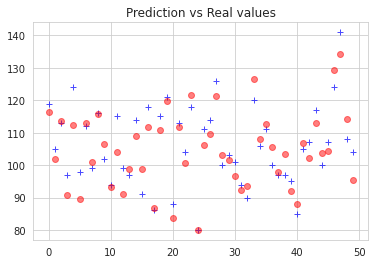

In [47]:
plt.plot(y_test.reset_index()['pts'][0:50], '+', color ='blue', alpha=0.7)
plt.plot(predictions[0:50], 'ro', color ='red', alpha=0.5)
plt.title('Prediction vs Real values')
plt.show()

# LA Lakers Model

In [48]:
# Let's set our data
X = lal_games.drop(['pts', 'date', 'month', 'year', 'vs'],1)
y = lal_games['pts']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [49]:
# Convert data as np.array
features = np.array(X_train)
targets = np.array(y_train)

features_validation= np.array(X_val)
targets_validation = np.array(y_val)

features_test= np.array(X_test)
targets_test = np.array(y_test)

In [50]:
print(features.shape)
print(targets.shape)

print(features_validation.shape)
print(targets_validation.shape)

print(features_test.shape)
print(targets_test.shape)

(1014, 13)
(1014,)
(254, 13)
(254,)
(318, 13)
(318,)


In [51]:
# Building the model
lal_model = Sequential() 
lal_model.add(Dense(200, input_dim=13, kernel_initializer='normal', activation='relu'))
lal_model.add(Dense(100, kernel_initializer='normal', activation='relu'))
lal_model.add(Dense(50, kernel_initializer='normal', activation='relu'))
lal_model.add(Dense(25, kernel_initializer='normal', activation='relu'))
lal_model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
lal_model.compile(loss = 'mse', optimizer='adam', metrics=['mse']) #mse: mean_square_error
lal_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 200)               2800      
_________________________________________________________________
dense_5 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_6 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_7 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 26        
Total params: 29,251
Trainable params: 29,251
Non-trainable params: 0
_________________________________________________________________


Step :  0 / 1000
32/32 [==============================] - 0s 1ms/step - loss: 33.5164 - mse: 33.5164
Training MSE: 33.51639175415039
8/8 [==============================] - 0s 1ms/step - loss: 32.9457 - mse: 32.9457
Validation MSE: 32.94572448730469 

Step :  100 / 1000
32/32 [==============================] - 0s 1ms/step - loss: 29.7398 - mse: 29.7398
Training MSE: 29.739770889282227
8/8 [==============================] - 0s 1ms/step - loss: 31.3908 - mse: 31.3908
Validation MSE: 31.390806198120117 

Step :  200 / 1000
32/32 [==============================] - 0s 1ms/step - loss: 31.2967 - mse: 31.2967
Training MSE: 31.29669761657715
8/8 [==============================] - 0s 1ms/step - loss: 35.6189 - mse: 35.6189
Validation MSE: 35.61891555786133 

Step :  300 / 1000
32/32 [==============================] - 0s 1ms/step - loss: 39.7493 - mse: 39.7493
Training MSE: 39.7492790222168
8/8 [==============================] - 0s 1ms/step - loss: 37.8886 - mse: 37.8886
Validation MSE: 37.888648

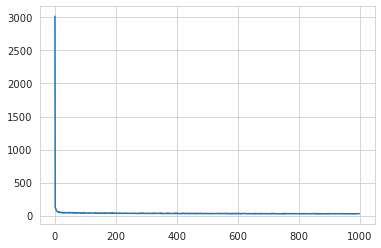

In [52]:
# Training the model
epochs_tot = 1000
epochs_step = 100
epochs_ratio = int(epochs_tot / epochs_step)
hist =np.array([])

for i in range(epochs_ratio):
    history = lal_model.fit(features, targets, epochs=epochs_step, batch_size=10, verbose=0)
    
    # Evaluating the model on the training and testing set
    print("Step : " , i * epochs_step, "/", epochs_tot)
    score = lal_model.evaluate(features, targets)
    print("Training MSE:", score[1])
    score = lal_model.evaluate(features_validation, targets_validation)
    print("Validation MSE:", score[1], "\n")
    hist = np.concatenate((hist, np.array(history.history['mse'])), axis = 0)
    
# plot metrics
plt.plot(hist)
plt.show()

# GS Warriors Model

In [53]:
# Let's set our data
X = gsw_games.drop(['pts', 'date', 'month', 'year', 'vs'],1)
y = gsw_games['pts']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [54]:
# Convert data as np.array
features = np.array(X_train)
targets = np.array(y_train)

features_validation= np.array(X_val)
targets_validation = np.array(y_val)

features_test= np.array(X_test)
targets_test = np.array(y_test)

In [55]:
print(features.shape)
print(targets.shape)

print(features_validation.shape)
print(targets_validation.shape)

print(features_test.shape)
print(targets_test.shape)

(1014, 13)
(1014,)
(254, 13)
(254,)
(318, 13)
(318,)


In [56]:
# Building the model
gsw_model = Sequential() 
gsw_model.add(Dense(50, input_dim=13, kernel_initializer='normal', activation='relu'))
gsw_model.add(Dense(10, kernel_initializer='normal', activation='relu'))
gsw_model.add(Dense(5, kernel_initializer='normal', activation='relu'))
gsw_model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
gsw_model.compile(loss = 'mse', optimizer='adam', metrics=['mse']) #mse: mean_square_error
gsw_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 50)                700       
_________________________________________________________________
dense_10 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_11 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 6         
Total params: 1,271
Trainable params: 1,271
Non-trainable params: 0
_________________________________________________________________


Step :  0 / 1000
32/32 [==============================] - 0s 973us/step - loss: 42.1036 - mse: 42.1036
Training MSE: 42.10364532470703
8/8 [==============================] - 0s 1ms/step - loss: 44.0642 - mse: 44.0642
Validation MSE: 44.064231872558594 

Step :  100 / 1000
32/32 [==============================] - 0s 992us/step - loss: 38.2847 - mse: 38.2847
Training MSE: 38.2846565246582
8/8 [==============================] - 0s 1ms/step - loss: 39.3131 - mse: 39.3131
Validation MSE: 39.31306838989258 

Step :  200 / 1000
32/32 [==============================] - 0s 992us/step - loss: 38.1443 - mse: 38.1443
Training MSE: 38.144256591796875
8/8 [==============================] - 0s 1ms/step - loss: 38.0722 - mse: 38.0722
Validation MSE: 38.07219696044922 

Step :  300 / 1000
32/32 [==============================] - 0s 1ms/step - loss: 34.3970 - mse: 34.3970
Training MSE: 34.397010803222656
8/8 [==============================] - 0s 1ms/step - loss: 34.9952 - mse: 34.9952
Validation MSE: 34

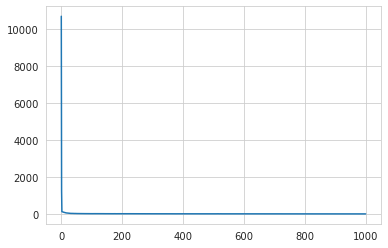

In [57]:
# Training the model
epochs_tot = 1000
epochs_step = 100
epochs_ratio = int(epochs_tot / epochs_step)
hist =np.array([])

for i in range(epochs_ratio):
    history = gsw_model.fit(features, targets, epochs=epochs_step, batch_size=10, verbose=0)
    
    # Evaluating the model on the training and testing set
    print("Step : " , i * epochs_step, "/", epochs_tot)
    score = gsw_model.evaluate(features, targets)
    print("Training MSE:", score[1])
    score = gsw_model.evaluate(features_validation, targets_validation)
    print("Validation MSE:", score[1], "\n")
    hist = np.concatenate((hist, np.array(history.history['mse'])), axis = 0)
    
# plot metrics
plt.plot(hist)
plt.show()

# Save model

In [58]:
sac_model.save("sac_ppg_model")
lal_model.save("lal_ppg_model")
gsw_model.save("gsw_ppg_model")